In [2]:
import tensorflow as tf
import pandas as pd
from PIL import Image


In [3]:
data = pd.read_csv("contour_labels_MOTB002.csv", header=None)
print(data)

                          0   1
0     MOTB002/contour10.png   0
1     MOTB002/contour11.png   5
2     MOTB002/contour12.png  26
3     MOTB002/contour13.png  24
4     MOTB002/contour14.png   0
..                      ...  ..
629  MOTB002/contour902.png   5
630  MOTB002/contour903.png   5
631  MOTB002/contour906.png  14
632  MOTB002/contour909.png   4
633  MOTB002/contour910.png   4

[634 rows x 2 columns]


In [21]:
#https://stackoverflow.com/questions/1109422/getting-list-of-pixel-values-from-pil
#opening and resizing one image
im = Image.open("Cropped_Contours/MOTB002/contour10.png")
#pixels = list(im.getdata())
# width, height = im.size
# print(width, height)
# pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]
# print(pixels)
tensor = tf.convert_to_tensor(im)
tensor = tf.expand_dims(tensor, 0)
print(tensor.shape)
tensor = tf.image.resize_with_pad(
    tensor, 64, 64, method=tf.image.ResizeMethod.BILINEAR,
    antialias=False
)
print(tensor)

(1, 42, 35)
tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ...

In [47]:
#https://www.tensorflow.org/tutorials/load_data/images
#work starts here
#create datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "Images_By_Label", labels='inferred', label_mode='int', image_size=(64,64),
    color_mode="grayscale", validation_split=0.2, subset="training", seed=123)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "Images_By_Label", labels='inferred', label_mode='int', image_size=(64,64),
    color_mode="grayscale", validation_split=0.2, subset="validation", seed=123)

Found 2045 files belonging to 27 classes.
Using 1636 files for training.
Found 2045 files belonging to 27 classes.
Using 409 files for validation.


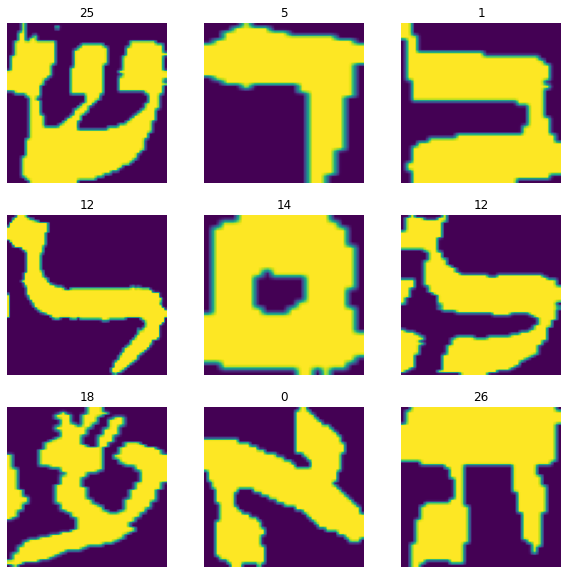

In [48]:
#visualize
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Dense(140, activation='relu'),
    tf.keras.layers.Dense(27)
])

In [50]:
model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10
                    )

Epoch 1/10
52/52 [==============================] - 1s 13ms/step - loss: 1.4644 - accuracy: 0.6455 - val_loss: 0.5704 - val_accuracy: 0.8313
Epoch 2/10
52/52 [==============================] - 0s 8ms/step - loss: 0.4253 - accuracy: 0.8839 - val_loss: 0.3812 - val_accuracy: 0.8924